# Tweet Sentiment's Impact on Stock Returns


With the rise of social media platforms, particularly Twitter, individuals express their opinions and sentiments about various topics, including companies and stocks. The goal of this project is to develop a machine learning model to investigate the impact of tweet sentiment on stock returns and evaluate whether the sentiment expressed in tweets about specific stocks can provide valuable insights into their subsequent stock returns. 

The goal is to develop an effective system that can achieve below metrics: 

- A correlation coefficient value between 0.5 and 1 (positive or negative) which indicates a meaningful relationship between tweet sentiment and subsequent stock returns. 
- A sentiment classification accuracy above 80%.

- An RMSE value as low as possible, indicating a small prediction error.


## 1- Imports

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


## 2- Upload Data

In [2]:
df= pd.read_csv('../RawData/full_dataset-release.csv', dtype={'Unnamed: 0': 'str'})

In [3]:
df.head()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.0,NaN
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1.0,0.0
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1.0,0.0
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395450 entries, 0 to 1395449
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1102013 non-null  object 
 1   TWEET              1395398 non-null  object 
 2   STOCK              862231 non-null   object 
 3   DATE               862231 non-null   object 
 4   LAST_PRICE         862231 non-null   float64
 5   1_DAY_RETURN       862231 non-null   float64
 6   2_DAY_RETURN       862231 non-null   float64
 7   3_DAY_RETURN       862231 non-null   float64
 8   7_DAY_RETURN       862231 non-null   float64
 9   PX_VOLUME          862231 non-null   float64
 10  VOLATILITY_10D     862130 non-null   float64
 11  VOLATILITY_30D     862184 non-null   float64
 12  LSTM_POLARITY      661102 non-null   float64
 13  TEXTBLOB_POLARITY  367665 non-null   float64
dtypes: float64(10), object(4)
memory usage: 149.1+ MB


## 3- Explore the Data

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LAST_PRICE,862231.0,7.161235e+02,4.731498e+03,-0.173554,0.000000,0.014220,1.156000e+02,1.655000e+05
1_DAY_RETURN,862231.0,1.473334e-03,2.306828e-02,-0.177851,-0.007511,0.000000,8.192149e-03,2.436389e-01
2_DAY_RETURN,862231.0,2.578825e-03,3.259363e-02,-0.204959,-0.011456,0.000000,1.391118e-02,2.671133e-01
3_DAY_RETURN,862231.0,3.262616e+06,1.053913e+07,-0.204959,-0.008466,0.010195,6.545426e-02,3.081068e+08
7_DAY_RETURN,862231.0,6.201036e+06,1.388221e+07,-0.204959,0.005474,15.750000,4.766038e+06,1.562074e+08
PX_VOLUME,862231.0,7.522187e+06,1.591847e+07,1.000000,20.517000,39.794000,6.531761e+06,3.148332e+08
VOLATILITY_10D,862130.0,1.829384e+01,1.627763e+01,-1.000000,8.792000,17.897000,2.391600e+01,1.241370e+02
VOLATILITY_30D,862184.0,1.073820e+01,1.469399e+01,-1.000000,0.000000,1.000000,2.081000e+01,8.768500e+01
LSTM_POLARITY,661102.0,9.937801e-02,7.605103e-01,-1.000000,-0.600000,0.000000,1.000000e+00,1.000000e+00
TEXTBLOB_POLARITY,367665.0,7.617648e-02,2.610480e-01,-1.000000,0.000000,0.000000,1.500000e-01,1.000000e+00


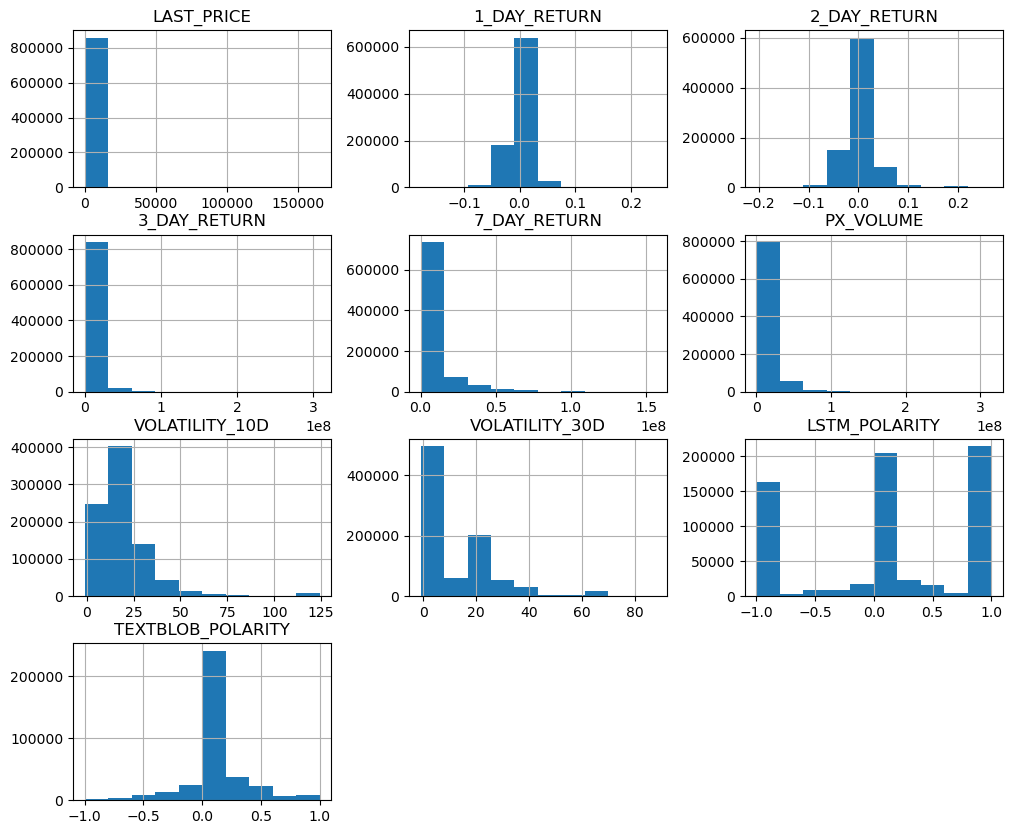

In [6]:
df.hist(figsize=(12,10));

>The rows with no Tweet information won't be helpful as we can not do sentiment analysis for those rows. Hence, we find these rows and remove them from the dataframe. 

### 3.1- Missing Tweets

In [7]:
df['TWEET'].isna().sum()

52

In [8]:
df[df['TWEET'].isna()]

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
22894,htt…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23091,htt…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125269,Lighting - much better flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264141,Microsoft Word highlights all your names in re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270150,Microsoft Word highlights all your names in re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270318,Twitter is my main chic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270319,Facebook the side chic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270320,Instagram is that chic that is way outta my le...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291692,This is nothing but the truth!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291693,🙆👍🙌 https://t.co/wfMLyhBJoj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Keep only rows with Tweet information available
df= df[df['TWEET'].notna()]

In [10]:
df.head()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.0,NaN
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1.0,0.0
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1.0,0.0
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1.0,0.0


>We can see for example in row 0 none of the information related to date, price, and returns are available. These rows won't be helpful as there is no data to evaluate the sentiment impact. Therefore, we need at least 3 columns to be not NaN. Hence, we set the threshold to 3 to drop the rows with less than 3 not NaN values.

In [11]:
df= df.dropna(thresh=3)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862231 entries, 1 to 1395449
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         568794 non-null  object 
 1   TWEET              862231 non-null  object 
 2   STOCK              862231 non-null  object 
 3   DATE               862231 non-null  object 
 4   LAST_PRICE         862231 non-null  float64
 5   1_DAY_RETURN       862231 non-null  float64
 6   2_DAY_RETURN       862231 non-null  float64
 7   3_DAY_RETURN       862231 non-null  float64
 8   7_DAY_RETURN       862231 non-null  float64
 9   PX_VOLUME          862231 non-null  float64
 10  VOLATILITY_10D     862130 non-null  float64
 11  VOLATILITY_30D     862184 non-null  float64
 12  LSTM_POLARITY      661102 non-null  float64
 13  TEXTBLOB_POLARITY  367665 non-null  float64
dtypes: float64(10), object(4)
memory usage: 98.7+ MB


In [13]:
df.head()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.0,NaN
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1.0,0.0
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1.0,0.0
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1.0,0.0
6,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,-1.000,0.8,NaN


>We can see there are still some rows that are not helpful. For example seems like row 1 and 6 are shifted to left by one column. However, shifting it to right cannot be hekoful since the Tweet value will be NaN and therefore not helpful. We find these rows and remove them as well. 

In [14]:
#Only keep rows without NaN in `Unnamed: 0`
df= df[df['Unnamed: 0'].notna()]

In [15]:
df= df.reset_index()

In [16]:
df.drop(columns=['index', 'Unnamed: 0'], inplace=True)

In [17]:
df.head()

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
0,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.0
1,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1.0,0.0
2,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.0
3,"RT @nikitakhara: Thank you, @Starbucks CEO for...",Starbucks,31/01/2017,55.22,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,1.0,0.2
4,@gawker Jamaicans make money with @Payoneer @P...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568794 entries, 0 to 568793
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TWEET              568794 non-null  object 
 1   STOCK              568794 non-null  object 
 2   DATE               568794 non-null  object 
 3   LAST_PRICE         568794 non-null  float64
 4   1_DAY_RETURN       568794 non-null  float64
 5   2_DAY_RETURN       568794 non-null  float64
 6   3_DAY_RETURN       568794 non-null  float64
 7   7_DAY_RETURN       568794 non-null  float64
 8   PX_VOLUME          568794 non-null  float64
 9   VOLATILITY_10D     568794 non-null  float64
 10  VOLATILITY_30D     568747 non-null  float64
 11  LSTM_POLARITY      367666 non-null  float64
 12  TEXTBLOB_POLARITY  367665 non-null  float64
dtypes: float64(10), object(3)
memory usage: 56.4+ MB


>Next, we'll check for the stock names to see how many unquie stocks are included in the dataset. 

### 3.2- Unique Stock Names

In [19]:
df['STOCK'].unique()

array(['PayPal', 'Starbucks', 'Amazon', ..., '4.27', '41.52', '33.7'],
      dtype=object)

>We can see there are some numbers in the name of the stocks which don't seem correct. We'll take a closer look to see what's wrong!

In [20]:
df[df['STOCK']=='4.27']

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
434982,31/08/2018,4.27,0.007025761124121839,0.035129,0.04918,0.063232,5413616.0,26.823,53.386,-1.0,-0.85,NaN,NaN


>Seems like these rows are missing values for Tweets, and stock names and can't provide any helpful information. We make a function to find the float values in the stock strings and remove them. 

In [21]:
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [22]:
#Add a new column to return True if the stock value is float and return False if the value is a string. Then we
#can remove the rows with "True" values and therefore only keep the string obbjects in the Tweet column. 

for i in range(len(df['STOCK'])):
    df.loc[i, 'STOCK_str']= is_float(df.loc[i,'STOCK'])
        

In [23]:
#Check if the new column shows True for the float value in the `STOCK` column. 

df[df['STOCK']=='4.27']

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,STOCK_str
434982,31/08/2018,4.27,0.007025761124121839,0.035129,0.04918,0.063232,5413616.0,26.823,53.386,-1.0,-0.85,NaN,NaN,True


In [24]:
#Keep only rows with string values in the STOCK column.

df= df[df['STOCK_str']==False]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367666 entries, 0 to 568793
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TWEET              367666 non-null  object 
 1   STOCK              367666 non-null  object 
 2   DATE               367666 non-null  object 
 3   LAST_PRICE         367666 non-null  float64
 4   1_DAY_RETURN       367666 non-null  float64
 5   2_DAY_RETURN       367666 non-null  float64
 6   3_DAY_RETURN       367666 non-null  float64
 7   7_DAY_RETURN       367666 non-null  float64
 8   PX_VOLUME          367666 non-null  float64
 9   VOLATILITY_10D     367666 non-null  float64
 10  VOLATILITY_30D     367621 non-null  float64
 11  LSTM_POLARITY      367666 non-null  float64
 12  TEXTBLOB_POLARITY  367665 non-null  float64
 13  STOCK_str          367666 non-null  object 
dtypes: float64(10), object(4)
memory usage: 42.1+ MB


In [26]:
# df[df['VOLATILITY_30D'].isna()]

> We are left with 367,666 rows which seem to have all or most of the information we need. There are still some missing values for the `VOLATILITY_30D`. After looking into more details, it was clear that all the missing values are related to Yahoo's stock. We can remove these rows as there is no clear approach on how to fill in the missing values and it can negatively impact our model if replaces inappropriatly. We can also remove the new column we added with boolean values of True/False.

In [27]:
df= df[df['VOLATILITY_30D'].notna()]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367621 entries, 0 to 568793
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TWEET              367621 non-null  object 
 1   STOCK              367621 non-null  object 
 2   DATE               367621 non-null  object 
 3   LAST_PRICE         367621 non-null  float64
 4   1_DAY_RETURN       367621 non-null  float64
 5   2_DAY_RETURN       367621 non-null  float64
 6   3_DAY_RETURN       367621 non-null  float64
 7   7_DAY_RETURN       367621 non-null  float64
 8   PX_VOLUME          367621 non-null  float64
 9   VOLATILITY_10D     367621 non-null  float64
 10  VOLATILITY_30D     367621 non-null  float64
 11  LSTM_POLARITY      367621 non-null  float64
 12  TEXTBLOB_POLARITY  367620 non-null  float64
 13  STOCK_str          367621 non-null  object 
dtypes: float64(10), object(4)
memory usage: 42.1+ MB


In [29]:
#Drop the new column that was added with boolean values. 

df.drop(columns='STOCK_str', inplace=True)

In [30]:
df['STOCK'].nunique()

101

In [31]:
#Find the 5 top STOCKs with the most TWEET numbers. 

df['STOCK'].value_counts(ascending= False)

Ford               52198
Facebook           40837
Google             33697
Next               32606
Apple              27940
                   ...  
Volkswagen            18
Equinor               12
CVS Health            11
21CF                   4
Cardinal Health        2
Name: STOCK, Length: 101, dtype: int64

>We can see the top 5 companies that were mentioned in the TWEETs are Ford, Facebook, Google, Next, and Apple. 

### 3.3- Data Type Conversion

>Next we convert the `DATE` column to datetime and sort all the data based on the DATE values in ascending order. 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367621 entries, 0 to 568793
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TWEET              367621 non-null  object 
 1   STOCK              367621 non-null  object 
 2   DATE               367621 non-null  object 
 3   LAST_PRICE         367621 non-null  float64
 4   1_DAY_RETURN       367621 non-null  float64
 5   2_DAY_RETURN       367621 non-null  float64
 6   3_DAY_RETURN       367621 non-null  float64
 7   7_DAY_RETURN       367621 non-null  float64
 8   PX_VOLUME          367621 non-null  float64
 9   VOLATILITY_10D     367621 non-null  float64
 10  VOLATILITY_30D     367621 non-null  float64
 11  LSTM_POLARITY      367621 non-null  float64
 12  TEXTBLOB_POLARITY  367620 non-null  float64
dtypes: float64(10), object(3)
memory usage: 39.3+ MB


In [33]:
# df['DATE'].unique()

In [34]:
df['DATE'] =  pd.to_datetime(df['DATE'], format= '%d/%m/%Y', dayfirst=True)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367621 entries, 0 to 568793
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   TWEET              367621 non-null  object        
 1   STOCK              367621 non-null  object        
 2   DATE               367621 non-null  datetime64[ns]
 3   LAST_PRICE         367621 non-null  float64       
 4   1_DAY_RETURN       367621 non-null  float64       
 5   2_DAY_RETURN       367621 non-null  float64       
 6   3_DAY_RETURN       367621 non-null  float64       
 7   7_DAY_RETURN       367621 non-null  float64       
 8   PX_VOLUME          367621 non-null  float64       
 9   VOLATILITY_10D     367621 non-null  float64       
 10  VOLATILITY_30D     367621 non-null  float64       
 11  LSTM_POLARITY      367621 non-null  float64       
 12  TEXTBLOB_POLARITY  367620 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(2)

In [36]:
df['DATE'].min() , df['DATE'].max()

(Timestamp('2017-01-31 00:00:00'), Timestamp('2018-10-31 00:00:00'))

In [37]:
df= df.sort_values(by='DATE', ascending= True)

>Next we can make separate dataframes for the top 5 companies to further evaluate their price and return variations over time.

In [38]:
df.head()

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
0,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.000000
101311,Netflix invests $12.5M for Mudbound. Last yea...,Amazon,2017-01-31,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,0.000000
101310,You posted on Facebook: I am truly Blessed wit...,Facebook,2017-01-31,130.32,0.005064,0.014273,0.014273,-0.007290,19790484.0,15.121,16.219,1.0,0.366667
101309,RT @Education4Libs: Starbucks pledged to hire ...,Starbucks,2017-01-31,55.22,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,1.0,0.000000
101308,Uncharted 4: A Thief's End (Sony PlayStation 4...,Sony,2017-01-31,3423.00,0.023079,0.023956,0.023956,-0.001461,11075000.0,20.183,19.517,-1.0,0.000000


In [39]:
#Reset Index

df= df.reset_index()

In [40]:
df.head()

,index,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
0,0,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.000000
1,101311,Netflix invests $12.5M for Mudbound. Last yea...,Amazon,2017-01-31,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,0.000000
2,101310,You posted on Facebook: I am truly Blessed wit...,Facebook,2017-01-31,130.32,0.005064,0.014273,0.014273,-0.007290,19790484.0,15.121,16.219,1.0,0.366667
3,101309,RT @Education4Libs: Starbucks pledged to hire ...,Starbucks,2017-01-31,55.22,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,1.0,0.000000
4,101308,Uncharted 4: A Thief's End (Sony PlayStation 4...,Sony,2017-01-31,3423.00,0.023079,0.023956,0.023956,-0.001461,11075000.0,20.183,19.517,-1.0,0.000000


In [41]:
df.drop(columns='index', inplace=True)

In [42]:
df['DATE'].nunique()

121

### 3.4- Explore Top 5 Company's Stocks

In [43]:
df_ford= df[df['STOCK']=='Ford']
df_fb= df[df['STOCK']=='Facebook']
df_google= df[df['STOCK']=='Google']
df_next= df[df['STOCK']=='Next']
df_apple= df[df['STOCK']=='Apple']

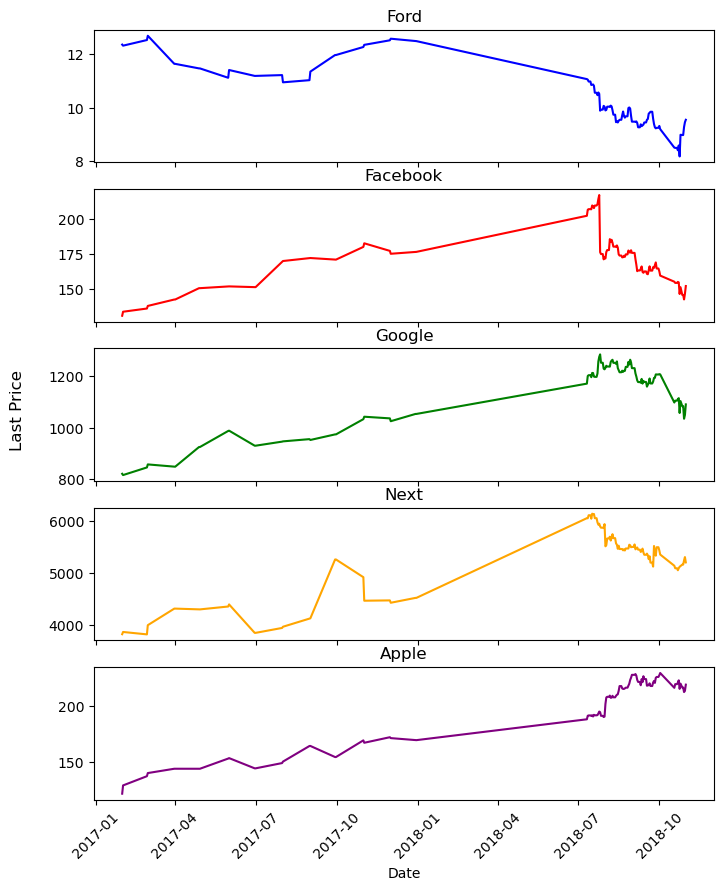

In [44]:

fig, ax = plt.subplots(5, 1, figsize=(8,10), sharex= True)
ax[0].plot(df_ford['DATE'], df_ford['LAST_PRICE'], c= 'b')
ax[1].plot(df_fb['DATE'], df_fb['LAST_PRICE'], c= 'r')
ax[2].plot(df_google['DATE'], df_google['LAST_PRICE'], c= 'g')
ax[3].plot(df_next['DATE'], df_next['LAST_PRICE'], c= 'orange')
ax[4].plot(df_apple['DATE'], df_apple['LAST_PRICE'], c= 'purple')

# ax[4].xaxis.set_major_locator(mdates.DayLocator(interval=30))

ax[0].title.set_text('Ford')
ax[1].title.set_text('Facebook')
ax[2].title.set_text('Google')
ax[3].title.set_text('Next')
ax[4].title.set_text('Apple')


plt.xticks(rotation=45)
fig.supylabel('Last Price')
plt.xlabel('Date');


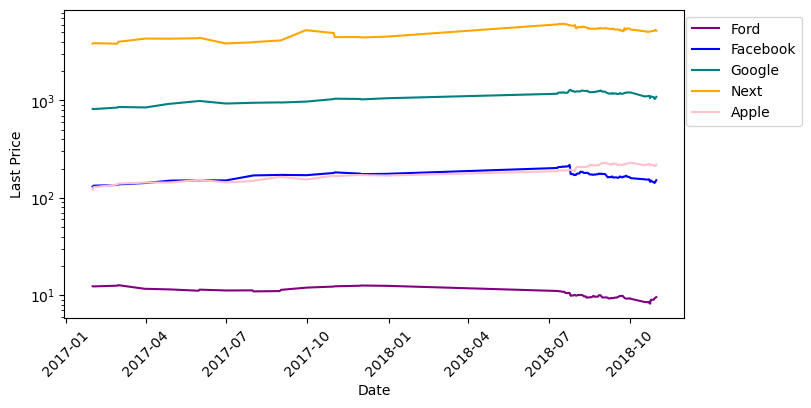

In [45]:

plt.subplots(figsize=(8,4))
plt.plot(df_ford['DATE'], df_ford['LAST_PRICE'], c= 'purple', label= 'Ford')
plt.plot(df_fb['DATE'], df_fb['LAST_PRICE'], c= 'blue', label= 'Facebook')
plt.plot(df_google['DATE'], df_google['LAST_PRICE'], c= 'teal', label= 'Google')
plt.plot(df_next['DATE'], df_next['LAST_PRICE'], c= 'orange', label= 'Next')
plt.plot(df_apple['DATE'], df_apple['LAST_PRICE'], c= 'pink', label= 'Apple')

# ax[4].xaxis.set_major_locator(mdates.DayLocator(interval=30))


plt.yscale('log')
plt.xticks(rotation=45)
plt.ylabel('Last Price')
plt.xlabel('Date')
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.5, 0.7, 0.5));


> We can see **Next** has the highest last price and **Ford** has the lowest price, while it can be seen in the next graph that **Next** has the lowest trade volume and **Ford** has the highest trade volume. 

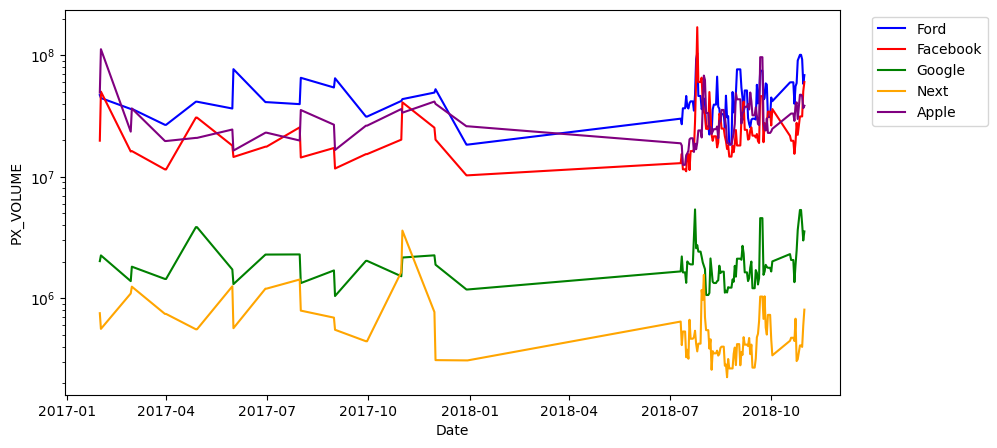

In [46]:
plt.subplots(figsize=(10,5))
plt.plot('DATE', 'PX_VOLUME', data=df_ford, c= 'b', label= 'Ford')
plt.plot('DATE', 'PX_VOLUME', data=df_fb, c= 'r', label= 'Facebook')
plt.plot('DATE', 'PX_VOLUME', data=df_google, c= 'g', label= 'Google')
plt.plot('DATE', 'PX_VOLUME', data=df_next, c= 'orange', label= 'Next')
plt.plot('DATE', 'PX_VOLUME', data=df_apple, c= 'purple', label= 'Apple')
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.5, 0.7, 0.5))
plt.yscale('log')
plt.ylabel('PX_VOLUME')
plt.xlabel('Date');


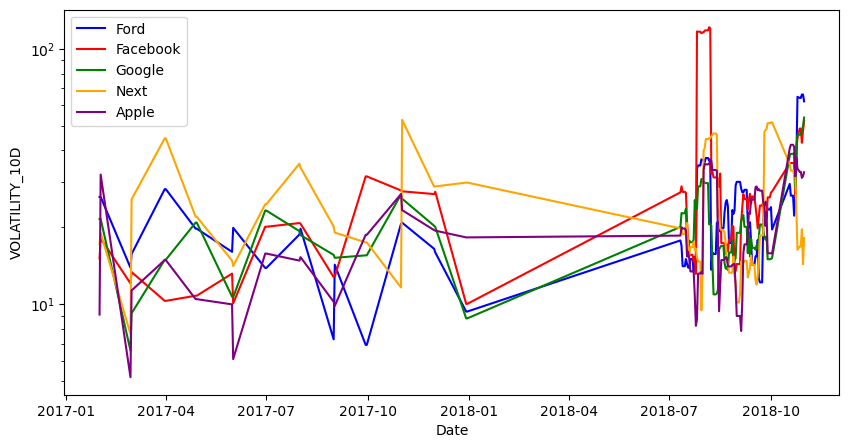

In [47]:
plt.subplots(figsize=(10,5))
plt.plot('DATE', 'VOLATILITY_10D', data=df_ford, c= 'b', label= 'Ford')
plt.plot('DATE', 'VOLATILITY_10D', data=df_fb, c= 'r', label= 'Facebook')
plt.plot('DATE', 'VOLATILITY_10D', data=df_google, c= 'g', label= 'Google')
plt.plot('DATE', 'VOLATILITY_10D', data=df_next, c= 'orange', label= 'Next')
plt.plot('DATE', 'VOLATILITY_10D', data=df_apple, c= 'purple', label= 'Apple')
plt.legend()
plt.yscale('log')
plt.ylabel('VOLATILITY_10D')
plt.xlabel('Date');

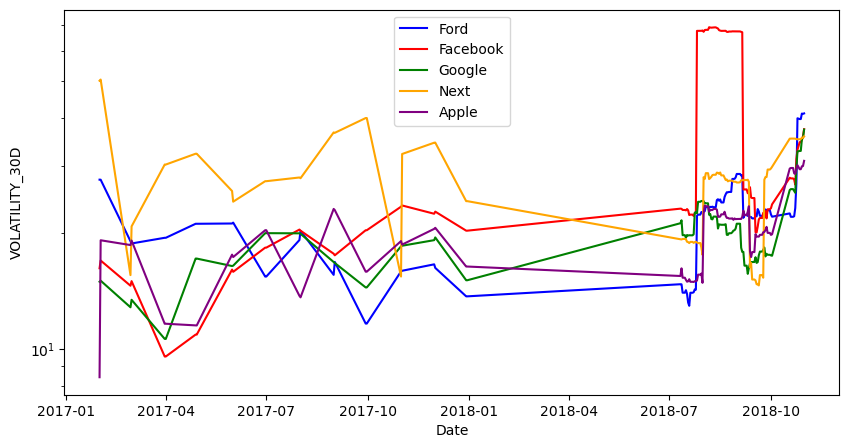

In [48]:
plt.subplots(figsize=(10,5))
plt.plot('DATE', 'VOLATILITY_30D', data=df_ford, c= 'b', label= 'Ford')
plt.plot('DATE', 'VOLATILITY_30D', data=df_fb, c= 'r', label= 'Facebook')
plt.plot('DATE', 'VOLATILITY_30D', data=df_google, c= 'g', label= 'Google')
plt.plot('DATE', 'VOLATILITY_30D', data=df_next, c= 'orange', label= 'Next')
plt.plot('DATE', 'VOLATILITY_30D', data=df_apple, c= 'purple', label= 'Apple')
plt.legend()
plt.yscale('log')
plt.ylabel('VOLATILITY_30D')
plt.xlabel('Date');

>Looking at 10 day and 30 day volatility, it can be seen that **Facebook** had a very high volatility during Aug to Seo of 2018. There has to be some influencing factors either related to the sentiments or maybe other factors. We'll evaluate it. Also, as seen in the next figure, the return was at its highest during this time.

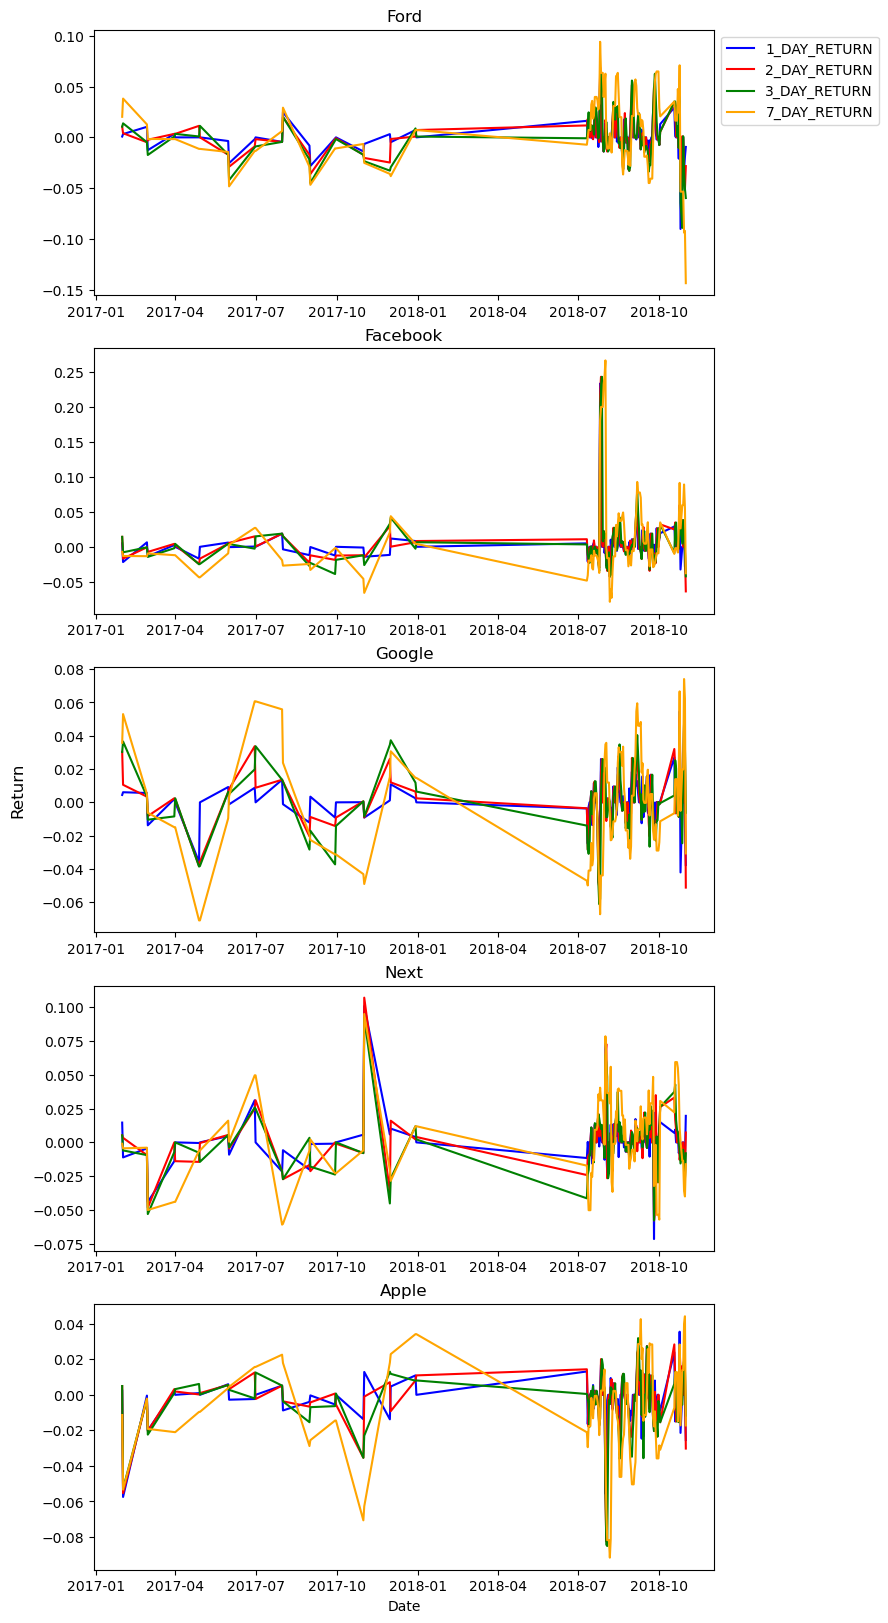

In [49]:
fig, ax = plt.subplots(5, 1, figsize=(8,20))
ax[0].plot('DATE', '1_DAY_RETURN', data=df_ford, c= 'b')
ax[0].plot('DATE', '2_DAY_RETURN', data=df_ford, c= 'r')
ax[0].plot('DATE', '3_DAY_RETURN', data=df_ford, c= 'g')
ax[0].plot('DATE', '7_DAY_RETURN', data=df_ford, c= 'orange')

ax[1].plot('DATE', '1_DAY_RETURN', data=df_fb, c= 'b')
ax[1].plot('DATE', '2_DAY_RETURN', data=df_fb, c= 'r')
ax[1].plot('DATE', '3_DAY_RETURN', data=df_fb, c= 'g')
ax[1].plot('DATE', '7_DAY_RETURN', data=df_fb, c= 'orange')

ax[2].plot('DATE', '1_DAY_RETURN', data=df_google, c= 'b')
ax[2].plot('DATE', '2_DAY_RETURN', data=df_google, c= 'r')
ax[2].plot('DATE', '3_DAY_RETURN', data=df_google, c= 'g')
ax[2].plot('DATE', '7_DAY_RETURN', data=df_google, c= 'orange')

ax[3].plot('DATE', '1_DAY_RETURN', data=df_next, c= 'b')
ax[3].plot('DATE', '2_DAY_RETURN', data=df_next, c= 'r')
ax[3].plot('DATE', '3_DAY_RETURN', data=df_next, c= 'g')
ax[3].plot('DATE', '7_DAY_RETURN', data=df_next, c= 'orange')

ax[4].plot('DATE', '1_DAY_RETURN', data=df_apple, c= 'b')
ax[4].plot('DATE', '2_DAY_RETURN', data=df_apple, c= 'r')
ax[4].plot('DATE', '3_DAY_RETURN', data=df_apple, c= 'g')
ax[4].plot('DATE', '7_DAY_RETURN', data=df_apple, c= 'orange')

ax[0].title.set_text('Ford')
ax[1].title.set_text('Facebook')
ax[2].title.set_text('Google')
ax[3].title.set_text('Next')
ax[4].title.set_text('Apple')

ax[0].legend( bbox_to_anchor=(1, 1))
fig.supylabel('Return')
plt.xlabel('Date');


### 3.5- Distribution of Feature Values

Looking at distribution plots blow, seems like the data are cleaned properly and there is no significant outlier in the data.

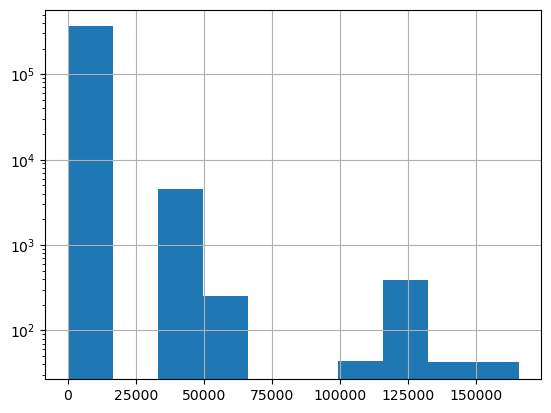

In [50]:
df['LAST_PRICE'].hist()
plt.yscale('log');

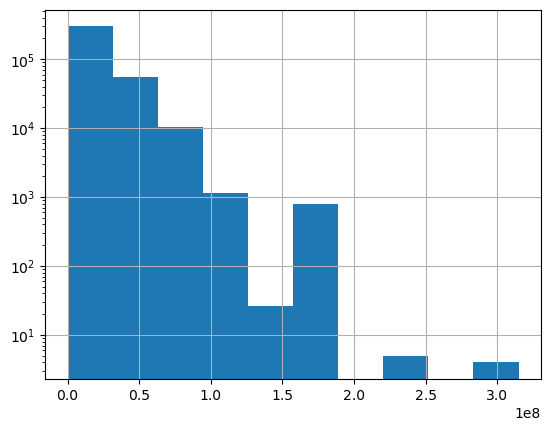

In [51]:
df['PX_VOLUME'].hist()
plt.yscale('log');

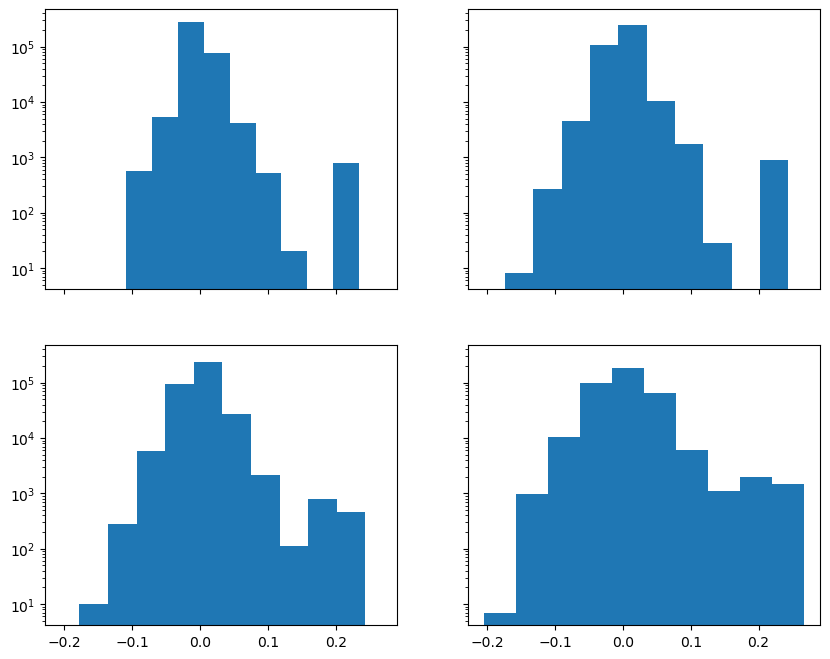

In [52]:
fig, ax= plt.subplots(2,2, figsize=(10,8), sharex= True, sharey= True)

ax[0,0].hist(df['1_DAY_RETURN'])
ax[0,1].hist(df['2_DAY_RETURN'])
ax[1,0].hist(df['3_DAY_RETURN'])
ax[1,1].hist(df['7_DAY_RETURN'])
plt.yscale('log');

Lastly, we can drop the `LSTM_POLARITY` and `TEXTBLOB_POLARITY` columns, since we will be going to do the sentiment analysis ourself. We can save `LSTM_POLARITY` as a seperate dataframe to later compare it with our analysis. 

In [53]:
#Save LSTM column in a different dataframe for future comparison 
df_LSTM= df['LSTM_POLARITY']

In [54]:
#Drop LSTM and TEXTBLOB POLARITY columns
df.drop(columns=['LSTM_POLARITY', 'TEXTBLOB_POLARITY'], inplace=True)

## 4- Save the Data

In [55]:
df.shape

(367621, 11)

In [56]:
# save the data to a new csv file
df.to_csv(r'../Data/sentiment_data_cleaned.csv')
